# Happiness Report Analysis
## Project Summary: Analyzing the Determinants of National Happiness

Central Question:
* To what extent do economic prosperity, health standards, and governmental trust influence a country's Happiness Score?

Methodology:
* The project involved a comprehensive analysis of data from the 2015 World Happiness Report. Key steps included:

Data Cleaning: 
* Ensuring the dataset was free from missing values and duplicates.

Data Aggregation:
* Grouping data by region and country to assess mean values of various factors such as happiness scores, GDP per capita, life expectancy, and trust in government.

Visual Exploration:
* Utilizing graphs and charts to visually analyze trends and correlations between happiness scores and factors like economy, health, and trust in government.

Key Findings:

* Economic Prosperity: There was a strong correlation between a country's economic status (measured by GDP per capita) and its happiness score. Nations with robust economies generally reported higher levels of happiness.

* Health Standards: Health, indicated by life expectancy, was closely linked to happiness scores. Countries with better health outcomes typically had higher happiness scores.

* Governmental Trust: The impact of trust in government on happiness was present but less pronounced compared to economic and health factors. While important, trust in government had a subtler influence on overall happiness.

In [1]:
import pandas as pd
# Correct the file path by adding quotes
file_path = '/Users/frostyalpaca/Desktop/HappinessReportAnalysis/data/2015.csv'

# Upload the Dataset and view data
df_2015 = pd.read_csv(file_path)
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Data Loading and Preliminary Analysis

In [7]:
# Checking the shape of the Dataset

df_shape = df_2015.shape

print(f"The dataset has {df_shape[0]} rows and {df_shape[1]} columns.")

The dataset has 158 rows and 12 columns.


In [8]:
# Concise Summary of the Dataset

df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
# Takeaways from .info() method

# There is no 'non-null' entries
# Country and Region are object Dtypes, avoid use them in calculations.

In [9]:
# Descriptive Statistics Summary

df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
# Statistic Summary Takeaways

# Happiness Score is 5.3 with a STD of 1.13. May suggest there is variability in country's happiness.
# Also the minimum and max of the Happiness Score suggest this as well.

### Data Cleaning

In [14]:
# Identify Missing Values

df_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [15]:
# There is no null entries

In [18]:
# Check for Duplicates

df_2015.duplicated().sum()

0

In [19]:
# There is no duplications

### Data Aggregation

In [44]:
# Aggregating the data by 'Region' by mean for each feature

aggregated_region_mean = df_2015.groupby('Region')[['Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)',\
                                                    'Trust (Government Corruption)']].mean()
# Sorting results by Happiness Score

aggregate_region_mean_sorted = aggregated_region_mean.sort_values(by='Happiness Score', ascending=False)

# Display
print(aggregate_region_mean_sorted)

                                 Happiness Score  Economy (GDP per Capita)  \
Region                                                                       
Australia and New Zealand               7.285000                  1.291880   
North America                           7.273000                  1.360400   
Western Europe                          6.689619                  1.298596   
Latin America and Caribbean             6.144682                  0.876815   
Eastern Asia                            5.626167                  1.151780   
Middle East and Northern Africa         5.406900                  1.066974   
Central and Eastern Europe              5.332931                  0.942438   
Southeastern Asia                       5.317444                  0.789054   
Southern Asia                           4.580857                  0.560486   
Sub-Saharan Africa                      4.202800                  0.380473   

                                 Health (Life Expectancy)  \
Re

In [45]:
# There is a strong correlation between economic propserity and happiness and. 
# Countries with higher life expectacy tend to have higher happiness scores.
# Trust is not as pronounced as the the other two. But seems it may still have a role in happiness score

In [51]:
# Aggregating Data by 'Country' by mean for each future

aggregated_country_mean = df_2015.groupby('Country')[['Happiness Score', 'Economy (GDP per Capita)',\
                                                      'Health (Life Expectancy)', 'Trust (Government Corruption)']].mean()

# Sorting results by Happiness Score

aggregated_country_mean_sorted = aggregated_country_mean.sort_values(by='Happiness Score', ascending=False)

# Display

print(aggregated_country_mean_sorted)

             Happiness Score  Economy (GDP per Capita)  \
Country                                                  
Switzerland            7.587                   1.39651   
Iceland                7.561                   1.30232   
Denmark                7.527                   1.32548   
Norway                 7.522                   1.45900   
Canada                 7.427                   1.32629   
...                      ...                       ...   
Rwanda                 3.465                   0.22208   
Benin                  3.340                   0.28665   
Syria                  3.006                   0.66320   
Burundi                2.905                   0.01530   
Togo                   2.839                   0.20868   

             Health (Life Expectancy)  Trust (Government Corruption)  
Country                                                               
Switzerland                   0.94143                        0.41978  
Iceland                       0.

Takeaways

* The top five countries in Happiness also had a high Economy score compared to the bottom five countries
* This is all the same pattern for Health.
* Rwanda which in the bottom 5 for Happiness Score has a higher trust score than all of the top 5 countries in Happiness Score
* Trust seems to not have as much of a impact on Happiness Score relative to the others'.

### Visual Explorations

In [55]:
# Import Modules: Seaborn and matplotlib.pyplot

import seaborn as sns
import matplotlib.pyplot as plt

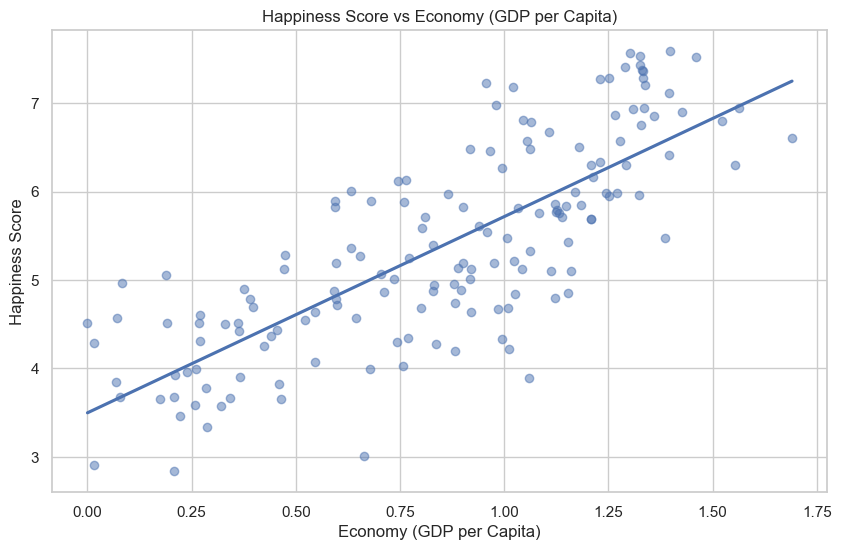

In [60]:
# Set style of plots
sns.set_theme(style="whitegrid")

# Create a scatterplot for Happiness Score vs Economy (GDP per Capita)
plt.figure(figsize=(10,6))
sns.regplot(x='Economy (GDP per Capita)', y='Happiness Score',\
            data=df_2015, ci=None, scatter_kws={'alpha':0.5})
plt.title('Happiness Score vs Economy (GDP per Capita)')
plt.show()

#### Takeaways

* Positive Correlation:
    * The upward trend of the data points indicates a positive correlation between GDP per Capita and Happiness Score. This suggest that as GDP per Capital increase, the The Happiness Score tends to increase as well.
* Regression Line:
    * The slope of the line indicates the strength and direction of linear relation which is a upward trend.
* Spread of Data Points:
    * The spread of datapoints around the regression line shows the variability in the data. A tigher clustering around the line would suggest a stronger relationship, whereas a wider spread indicates more variability and suggests that other factos might also influence the Happiness Score.

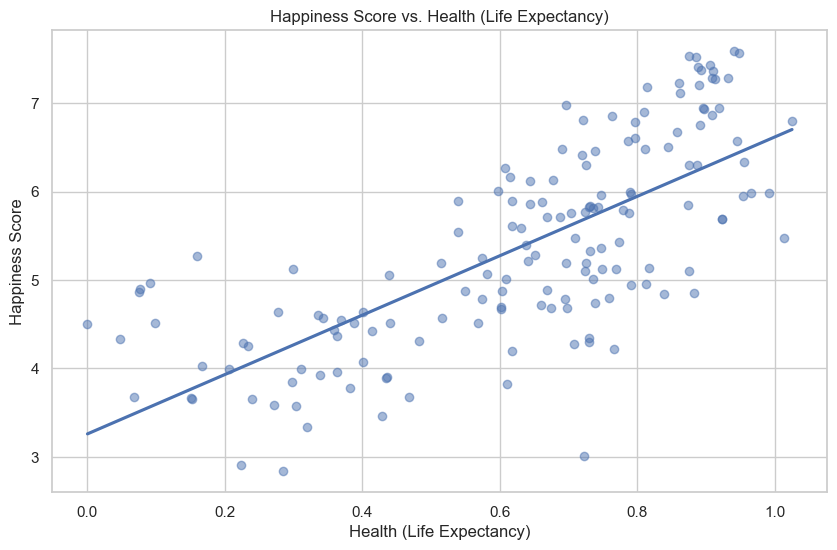

In [66]:
# Create a scatter plot for Happiness Score vs Health (Life Expectancy)
plt.figure(figsize=(10,6))
sns.regplot(x='Health (Life Expectancy)', y='Happiness Score',\
            data=df_2015, ci=None, scatter_kws={'alpha':0.5})
plt.title('Happiness Score vs. Health (Life Expectancy)')
plt.show()

#### Takeaways

* Positive Correlation:
    * The upward trend of the data points indicates a positive correlation between Health (Life Expectancy) and Happiness Score. This suggest that as Health increases, the The Happiness Score tends to increase as well.
* Regression Line:
    * The slope of the line indicates the strength and direction of linear relation which is a upward trend.
* Spread of Data Points:
    * The spread of datapoints around the regression line shows the variability in the data. A tigher clustering around the line would suggest a stronger relationship, whereas a wider spread indicates more variability and suggests that other factos might also influence the Happiness Score.

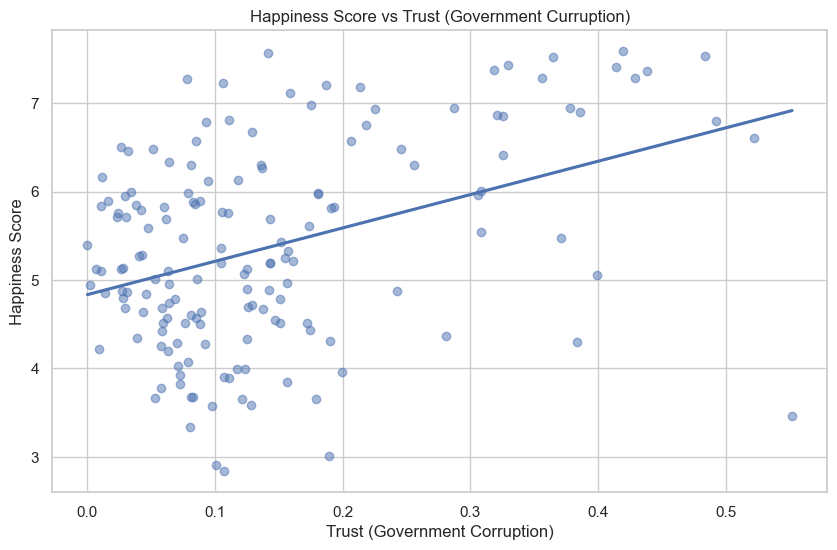

In [71]:
# Create a scatter plot for Happiness Score vs. Trust (Goverment Curruption)

plt.figure(figsize=(10,6))
sns.regplot(x='Trust (Government Corruption)', y='Happiness Score',\
            data=df_2015, ci=None, scatter_kws={'alpha':0.5})
plt.title('Happiness Score vs Trust (Government Curruption)')
plt.show()

### Takeways

* Positive Correlations:
    * The positive correlation indicates that higher levels of trust in government tends to be with associated with higher happiness scores.
* Data Spread
    * The spread of the data points around the regression line shows some degree of variability, indiciating the truth in government is not the only factor affecting happiness scores. There are countries with low corruption perception that have varying levels of happiness.

### Conclusion

Based on these findings, it's evident that economic factors and health significantly influence the happiness scores of countries. The strong correlation between these factors and happiness scores suggests that policies aimed at economic development and improving health can potentially enhance the overall happiness and well-being of a population.

The role of trust in government, while not as pronounced as economic and health factors, still appears to play a role in a nation's happiness. This indicates that good governance and transparency might contribute to the overall happiness, though their impact might be less direct or significant compared to economic and health factors.

In conclusion, for nations seeking to improve their happiness scores, focusing on economic growth and healthcare improvements should be a priority. Additionally, fostering trust in government, while potentially less impactful, can still contribute to the overall happiness and satisfaction of the populace. 